In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import os
import numpy as np
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA 

lean_week = pd.read_csv('train_weather_week_lean.csv')

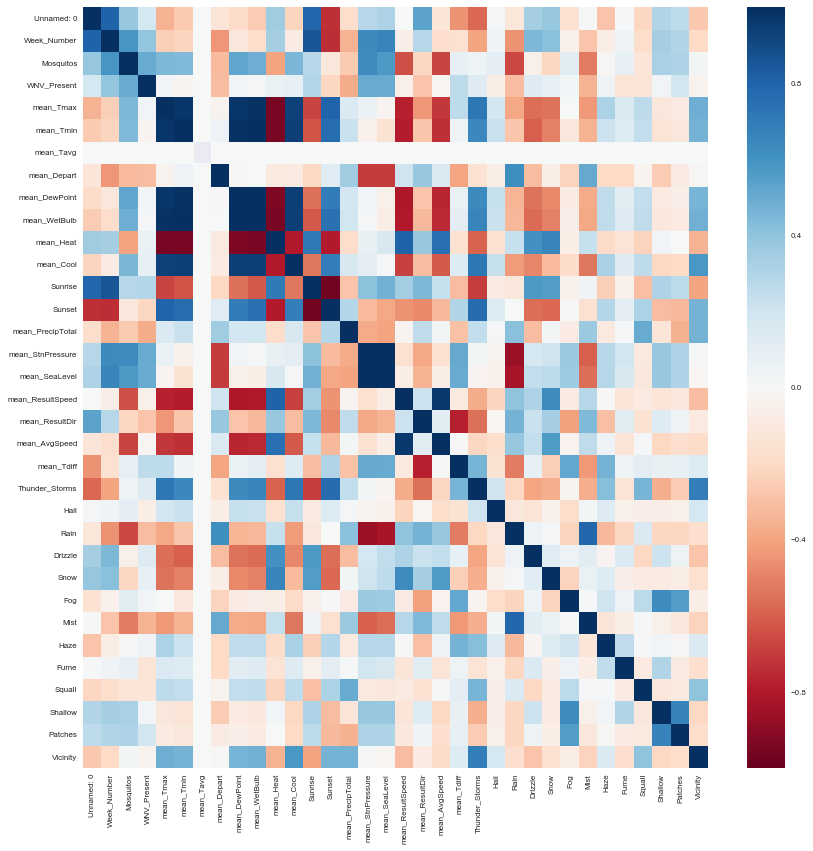

In [209]:
sns.set()
sns.set_context("paper")
plt.figure(figsize=(14, 14))
sns.heatmap(lean_week.corr(), cmap="RdBu")

In [210]:
lean_week.dtypes

Unnamed: 0            int64
start date           object
Week_Number         float64
Mosquitos             int64
WNV_Present           int64
mean_Tmax           float64
mean_Tmin           float64
mean_Tavg           float64
mean_Depart         float64
mean_DewPoint       float64
mean_WetBulb        float64
mean_Heat           float64
mean_Cool           float64
Sunrise             float64
Sunset              float64
mean_PrecipTotal    float64
mean_StnPressure    float64
mean_SeaLevel       float64
mean_ResultSpeed    float64
mean_ResultDir      float64
mean_AvgSpeed       float64
mean_Tdiff          float64
Thunder_Storms      float64
Hail                float64
Rain                float64
Drizzle             float64
Snow                float64
Fog                 float64
Mist                float64
Haze                float64
Fume                float64
Squall              float64
Shallow             float64
Patches             float64
Vicinity            float64
dtype: object

In [211]:
lean_week_clean = lean_week.drop(['start date', 'Unnamed: 0', 'Week_Number'],
                                 axis=1)

In [212]:
lean_week_std =(lean_week_clean - lean_week_clean.mean())/lean_week_clean.std()

In [213]:
lean_week_std.head()

,Mosquitos,WNV_Present,mean_Tmax,mean_Tmin,mean_Tavg,mean_Depart,mean_DewPoint,mean_WetBulb,mean_Heat,mean_Cool,...,Drizzle,Snow,Fog,Mist,Haze,Fume,Squall,Shallow,Patches,Vicinity
0,-1.724924,-1.864821,-0.900286,-0.365637,-0.0,2.659744,-0.661634,-0.633852,0.126589,-1.184714,...,-0.909189,-0.251454,-0.895907,2.507080,-1.839162,-0.265676,-0.333775,-0.333775,-0.286534,-0.608195
1,-0.997589,-0.383182,-1.068330,-1.206209,-0.0,-0.263190,-1.333264,-1.247867,1.152807,-1.073905,...,-0.140611,-0.251454,-0.057800,-0.359252,0.235204,-0.265676,-0.333775,-0.333775,-0.286534,0.399671
2,-0.903940,-0.630122,-0.638769,-0.988095,0.0,0.183169,-1.053671,-0.937175,0.619614,-0.932553,...,0.243677,-0.251454,1.618412,0.572305,1.077915,-0.265676,-0.333775,-0.333775,-0.286534,-0.608195
3,-1.053778,0.357637,-0.496982,-0.920705,0.0,-0.734747,-1.037716,-0.858581,0.602122,-0.734376,...,0.627966,-0.251454,0.989832,0.249843,0.105556,-0.265676,-0.333775,-0.333775,-0.286534,0.903604
4,-0.753062,0.357637,-0.048516,-0.346797,0.0,0.150772,-0.560205,-0.382106,0.094844,-0.271962,...,-0.717044,-0.251454,0.361253,-1.040006,-0.672331,-0.265676,-0.333775,-0.333775,-0.286534,-0.608195


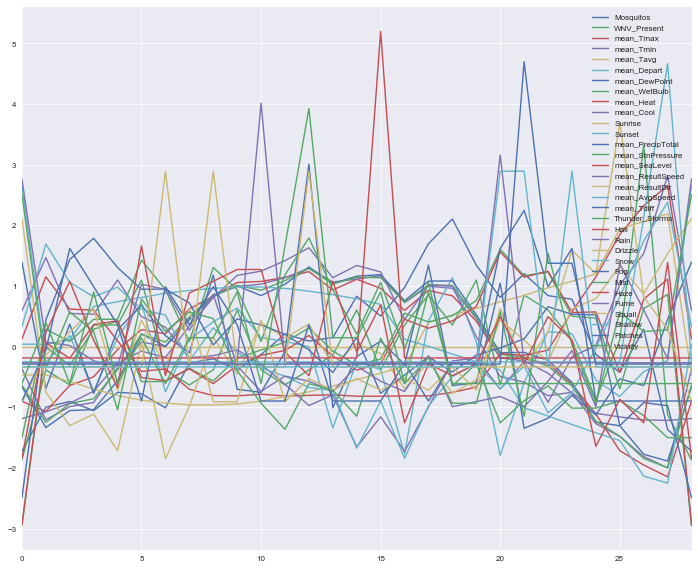

In [214]:
lean_week_std.plot(kind='line',legend=True, figsize=(12,10))

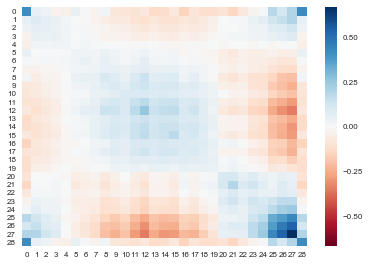

In [163]:
X = np.cov(lean_week_std)
sns.heatmap(np.cov(X), cmap="RdBu")
sns.set()
plt.figure(figsize=(20, 20))

In [164]:
pca = PCA(n_components=2)
pca.fit(lean_week_std.values)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [165]:
lean_week_std.head()

,Mosquitos,WNV_Present,mean_Tmax,mean_Tmin,mean_Tavg,mean_Depart,mean_DewPoint,mean_WetBulb,mean_Heat,mean_Cool,...,Drizzle,Snow,Fog,Mist,Haze,Fume,Squall,Shallow,Patches,Vicinity
0,-1.724924,-1.864821,-0.900286,-0.365637,-0.0,2.659744,-0.661634,-0.633852,0.126589,-1.184714,...,-0.909189,-0.251454,-0.895907,2.507080,-1.839162,-0.265676,-0.333775,-0.333775,-0.286534,-0.608195
1,-0.997589,-0.383182,-1.068330,-1.206209,-0.0,-0.263190,-1.333264,-1.247867,1.152807,-1.073905,...,-0.140611,-0.251454,-0.057800,-0.359252,0.235204,-0.265676,-0.333775,-0.333775,-0.286534,0.399671
2,-0.903940,-0.630122,-0.638769,-0.988095,0.0,0.183169,-1.053671,-0.937175,0.619614,-0.932553,...,0.243677,-0.251454,1.618412,0.572305,1.077915,-0.265676,-0.333775,-0.333775,-0.286534,-0.608195
3,-1.053778,0.357637,-0.496982,-0.920705,0.0,-0.734747,-1.037716,-0.858581,0.602122,-0.734376,...,0.627966,-0.251454,0.989832,0.249843,0.105556,-0.265676,-0.333775,-0.333775,-0.286534,0.903604
4,-0.753062,0.357637,-0.048516,-0.346797,0.0,0.150772,-0.560205,-0.382106,0.094844,-0.271962,...,-0.717044,-0.251454,0.361253,-1.040006,-0.672331,-0.265676,-0.333775,-0.333775,-0.286534,-0.608195


In [166]:
print pca.explained_variance_ratio_.sum()

0.536487416897


In [167]:
pca = PCA(n_components=5)
pca.fit(lean_week_std)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [168]:
print pca.explained_variance_ratio_.sum()

0.759613646618


Below we are doing the PCA with normalized dataframe

In [169]:
lean_week_norm = preprocessing.normalize(lean_week_clean, axis=0)

In [170]:
pca = PCA(n_components=5)
pca.fit(lean_week_norm)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [171]:
print pca.explained_variance_ratio_.sum()

0.72959077887


Below we are using the min max scaler to standardize the dataframe 

In [172]:
lean_week_minmax = lean_week_clean.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [173]:
lean_week_minmax.describe()

,Mosquitos,WNV_Present,mean_Tmax,mean_Tmin,mean_Tavg,mean_Depart,mean_DewPoint,mean_WetBulb,mean_Heat,mean_Cool,...,Drizzle,Snow,Fog,Mist,Haze,Fume,Squall,Shallow,Patches,Vicinity
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.450346,0.359606,0.634181,0.607284,0.743891,0.402680,0.589496,0.607095,0.235032,0.427052,...,0.197158,0.051108,0.285057,0.352100,0.525401,0.062069,0.103448,0.103448,0.057471,0.134100
std,0.261082,0.192837,0.295477,0.303629,0.312099,0.224578,0.312558,0.304466,0.287782,0.351294,...,0.216851,0.203251,0.318178,0.258428,0.285674,0.233626,0.309934,0.309934,0.200574,0.220488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247759,0.238095,0.445439,0.375255,0.780393,0.278901,0.382696,0.408874,0.003915,0.099451,...,0.041667,0.000000,0.000000,0.111111,0.388889,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.417550,0.333333,0.696807,0.608256,0.853690,0.419563,0.591076,0.630593,0.129765,0.364450,...,0.125000,0.000000,0.200000,0.361111,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.662592,0.476190,0.908142,0.908252,0.902441,0.458367,0.903112,0.914004,0.400481,0.784407,...,0.291667,0.000000,0.600000,0.500000,0.777778,0.000000,0.000000,0.000000,0.000000,0.166667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [174]:
lean_week_pca = PCA(n_components=5)
lean_week_pca.fit(lean_week_minmax)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [175]:
print lean_week_pca.explained_variance_ratio_.sum()

0.802369779937


In [177]:
X = lean_week_minmax.drop(['Mosquitos','WNV_Present'],axis=1)
y = lean_week_minmax['WNV_Present']

In [178]:
lean_week_pca.fit(X,y)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [179]:
lean_week_pca.score(X)

12.553412733556346

In [153]:
from sklearn.cross_decomposition import PLSRegression

In [181]:
pls = PLSRegression(n_components =5)
pls.fit(X,y)

PLSRegression(copy=True, max_iter=500, n_components=5, scale=True, tol=1e-06)

In [182]:
pls.score(X,y)

-5.7821073473184343

In [187]:
pls.x_scores_

array([[ -7.21592873e+00,   3.55678103e-01,  -1.08656169e+00,
          4.81497149e-01,  -9.10789200e-01],
       [ -4.90392078e-01,   3.28634018e-01,  -2.53403570e+00,
         -1.63141023e+00,  -2.54340653e-01],
       [ -2.30916597e-03,  -2.70033934e-01,  -1.83879243e+00,
         -1.34520678e-01,  -7.20006209e-03],
       [  1.19872816e+00,   1.34875568e-01,  -9.10558324e-01,
         -4.61114000e-01,   1.60958770e-01],
       [  8.31701792e-01,   3.75177186e-01,   4.19643615e-01,
         -8.63035745e-02,   6.92510648e-01],
       [ -1.20644553e+00,   1.67786678e-01,   1.52660353e+00,
          9.02562177e-01,   1.82812078e+00],
       [ -6.16023055e-01,  -5.25387302e-01,   5.16958476e-01,
          3.48239104e-01,   3.38435297e-01],
       [ -2.30232158e-01,  -6.77671154e-01,   6.72345771e-01,
          1.21333020e-01,  -5.37050337e-02],
       [ -1.60373720e+00,  -1.16567822e+00,   1.48898295e+00,
          7.63288145e-01,   7.86089303e-01],
       [  2.07161175e-01,  -6.3378554

In [188]:
pls.x_weights_.shape

(30, 5)

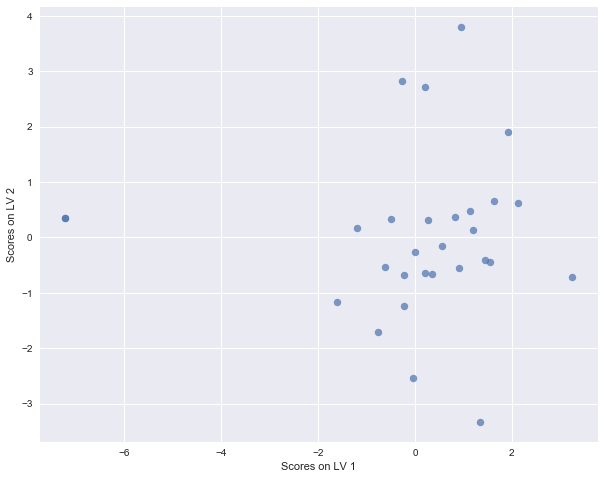

In [196]:
scores = pd.DataFrame(pls.x_scores_)
scores.index=lean_week_minmax.drop(['Mosquitos','WNV_Present'],axis=1)

ax = scores.plot(x=0, y=1, kind='scatter', s=50, alpha=0.7, figsize=(10,8))
ax.set_xlabel('Scores on LV 1')
ax.set_ylabel('Scores on LV 2')